In [61]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


#Configuration 1: model a => dataset1 (train / test split)
df = pd.read_csv('fake_or_real_news.csv')
df.shape
df.head()
y = df.label
df = df.drop('label', axis=1)
x=df['text']

#Splitting Dataset
train_size = int(0.7 * len(x))
x_train=x[:train_size]
x_raw_test=x[train_size:]

y_raw_train=y[:train_size]
y_raw_test=y[train_size:]

x=df['text']
train_size = int(0.7 * len(x))
x_raw_train=x[:train_size]
x_raw_test=x[train_size:]

y_raw_train=y[:train_size]
y_raw_test=y[train_size:]


#Training

acc_score=0
fmeasure=0
pre_score=0
rcall_score=0
fold_size=5
performance_measure_model1=[]
#  5-fold cross-validation
skf = StratifiedKFold(n_splits=fold_size, shuffle=True, random_state=0)
clf = LogisticRegression(class_weight='balanced')
###vectorizing data
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
x_tfidf=tfidf_vectorizer.fit_transform(x)
###stratified k-fold
for train_index, test_index in skf.split(x_raw_train, y_raw_train):
    x_train, x_test = x_raw_train[train_index], x_raw_train[test_index]
    y_train, y_test = y_raw_train[train_index], y_raw_train[test_index]

    tfidf_train=tfidf_vectorizer.transform(x_train) 
    tfidf_test = tfidf_vectorizer.transform(x_test)
    
    clf.fit(tfidf_train, y_train)
    y_pred = clf.predict(tfidf_test)
    acc_score += metrics.accuracy_score(y_test, y_pred)
    fmeasure+=metrics.f1_score(y_test, y_pred,average='macro')
    pre_score+=metrics.precision_score(y_test, y_pred,average='macro')
    rcall_score+=metrics.recall_score(y_test, y_pred,average='macro')

performance_measure_model1.append(pre_score/fold_size)
performance_measure_model1.append(rcall_score/fold_size)
performance_measure_model1.append(fmeasure/fold_size)
performance_measure_model1.append(acc_score/fold_size)
print('Training measurements')
print('precision','recall','Fmeasure','accuracy')
print(performance_measure_model1)

#Results of Task1 (Test Measurements)
print('Test Measurements')
tfidf_test = tfidf_vectorizer.transform(x_raw_test)
test_test_pred = clf.predict(tfidf_test)
acc_score = metrics.accuracy_score(y_raw_test, test_test_pred)
print('Average accuracy:',acc_score)
fmeasure=metrics.f1_score(y_raw_test, test_test_pred,average='macro')
print('Average f1:',fmeasure)
pre_score=metrics.precision_score(y_raw_test, test_test_pred,average='macro')
print('Average precision:',pre_score)
rcall_score=metrics.recall_score(y_raw_test, test_test_pred,average='macro')
print('Average Recall:',rcall_score)

Training measurements
precision recall Fmeasure accuracy
[0.9101450471676342, 0.9083168771555759, 0.9079029301777306, 0.9079825310637952]
Test Measurements
Average accuracy: 0.9047869542346134
Average f1: 0.9046006856597846
Average precision: 0.9062191982591941
Average Recall: 0.9042923986190983


In [62]:
#Configuration 2) model b => dataset2 (train / validation / test split)

# Measurements on training set

#Loading the Data
df_model2_train = pd.read_csv('train.tsv', sep='\t', header=None)
df_model2_train.shape
y_model2_train= df_model2_train[1]
x_model2_train=df_model2_train[2]


tfidf_train = tfidf_vectorizer.transform(x_model2_train)
tfidf_test = tfidf_vectorizer.transform(x_model2_train)
clf2=MultinomialNB()
clf2.fit(tfidf_train, y_model2_train)

y_pred = clf2.predict(tfidf_test)
train_model2_pred = clf2.predict(tfidf_test)
acc_score = metrics.accuracy_score(y_model2_train, train_model2_pred)
print('Measurements on training set for Dataset2')
print('Average accuracy:',acc_score)
fmeasure=metrics.f1_score(y_model2_train, train_model2_pred,average='macro')
print('Average f1:',fmeasure)
pre_score=metrics.precision_score(y_model2_train, train_model2_pred,average='macro')
print('Average precision:',pre_score)
rcall_score=metrics.recall_score(y_model2_train, train_model2_pred,average='macro')
print('Average Recall:',rcall_score)



Measurements on training set for Dataset2
Average accuracy: 0.54794921875
Average f1: 0.46149842450823847
Average precision: 0.7271079379323123
Average Recall: 0.4797677668250742


In [63]:
#Function for confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def get_Scores(y_test,y_star):
    scores = []
    scores.append(metrics.precision_score(y_test, y_star, average = 'macro'))
    scores.append(metrics.recall_score(y_test, y_star,average = 'macro'))
    scores.append(metrics.f1_score(y_test, y_star, average = 'macro'))
    scores.append(metrics.accuracy_score( y_test, y_star))    
    print('Scores:')
    print('precision: {}, recall: {}, \n f_measure: {}, accuracy: {}'.format(scores[0],scores[1],scores[2],scores[3]))
    
    return scores

Scores:
precision: 0.7271079379323123, recall: 0.4797677668250742, 
 f_measure: 0.46149842450823847, accuracy: 0.54794921875
Confusion matrix, without normalization


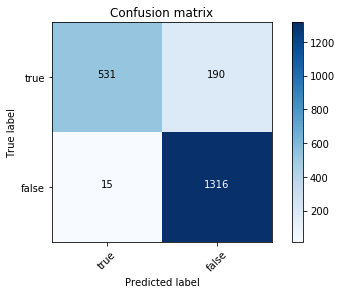

In [64]:
#Confusion matrix and Scores for training set
scores = get_Scores(y_model2_train, train_model2_pred)
confusion_matrix = metrics.confusion_matrix(y_model2_train, train_model2_pred, labels=['true', 'false'])
plot_confusion_matrix(confusion_matrix, classes=['true', 'false'])

0.23052959501557632
0.16583238679872242
0.20809452488116997
0.19834679554818432
Scores:
precision: 0.20809452488116997, recall: 0.19834679554818432, 
 f_measure: 0.16583238679872242, accuracy: 0.23052959501557632
Confusion matrix, without normalization


/home/pooja/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pooja/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pooja/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pooja/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


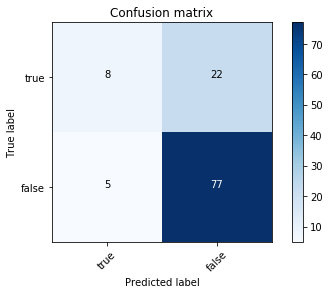

In [65]:
#Measurements on Validation Set
df_model2_valid = pd.read_csv('valid.tsv', sep='\t', header=None)
df_model2_valid.shape
df_model2_valid.head()
y_model2_valid = df_model2_valid[1]
x_model2_valid=df_model2_valid[2]

tfidf_valid = tfidf_vectorizer.transform(x_model2_valid)

valid_model2_pred = clf2.predict(tfidf_valid)
acc_score = metrics.accuracy_score(y_model2_valid, valid_model2_pred)
print(acc_score)
fmeasure=metrics.f1_score(y_model2_valid, valid_model2_pred,average='macro')
print(fmeasure)
pre_score=metrics.precision_score(y_model2_valid, valid_model2_pred,average='macro')
print(pre_score)
rcall_score=metrics.recall_score(y_model2_valid, valid_model2_pred,average='macro')
print(rcall_score)

#Confusion matrix and Scores for Validation Set
scores = get_Scores(y_model2_valid, valid_model2_pred)
confusion_matrix = metrics.confusion_matrix(y_model2_valid, valid_model2_pred, labels=['true', 'false'])
plot_confusion_matrix(confusion_matrix, classes=['true', 'false'])

0.24151539068666142
0.16770752568170275
0.22163248056583548
0.2022830662644596
Scores:
precision: 0.22163248056583548, recall: 0.2022830662644596, 
 f_measure: 0.16770752568170275, accuracy: 0.24151539068666142
Confusion matrix, without normalization


/home/pooja/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pooja/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pooja/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pooja/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


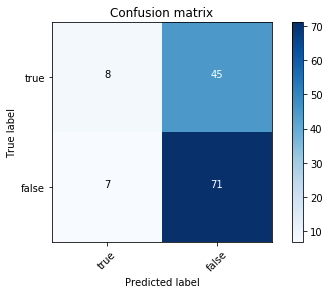

In [72]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#Measurement of test set

df_model2_test = pd.read_csv('test.tsv', sep='\t', header=None)
df_model2_test.shape
df_model2_test.head()
y_model2_test = df_model2_test[1]
x_model2_test=df_model2_test[2]
tfidf_test_model2 = tfidf_vectorizer.transform(x_model2_test)

test_model2_pred = clf2.predict(tfidf_test_model2)
acc_score = metrics.accuracy_score(y_model2_test, test_model2_pred)
print(acc_score)
fmeasure=metrics.f1_score(y_model2_test, test_model2_pred,average='macro')
print(fmeasure)
pre_score=metrics.precision_score(y_model2_test, test_model2_pred,average='macro')
print(pre_score)
rcall_score=metrics.recall_score(y_model2_test, test_model2_pred,average='macro')
print(rcall_score)

#Confusion matrix and Scores for test set
scores = get_Scores(y_model2_test, test_model2_pred)
confusion_matrix = metrics.confusion_matrix(y_model2_test, test_model2_pred, labels=['true', 'false'])
plot_confusion_matrix(confusion_matrix, classes=['true', 'false'])

0.0
0.0
0.0
0.0
Scores:
precision: 0.0, recall: 0.0, 
 f_measure: 0.0, accuracy: 0.0
Confusion matrix, without normalization


/home/pooja/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pooja/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/pooja/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pooja/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/pooja/anaconda3/lib/python3.6/site-packages/sklearn

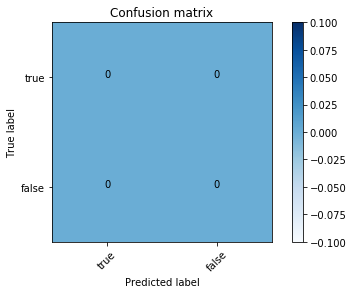

In [67]:
#Configuration 3) model a => dataset2 | model2 => dataset1 (test)
clf_pred = clf.predict(tfidf_test_model2)
acc_score = metrics.accuracy_score(y_model2_test, clf_pred)
print(acc_score)
fmeasure=metrics.f1_score(y_model2_test, clf_pred,average='macro')
print(fmeasure)
pre_score=metrics.precision_score(y_model2_test, clf_pred,average='macro')
print(pre_score)
rcall_score=metrics.recall_score(y_model2_test, clf_pred,average='macro')
print(rcall_score)

#Confusion matrix and Scores for test set
scores = get_Scores(y_model2_test, clf_pred)
confusion_matrix = metrics.confusion_matrix(y_model2_test, clf_pred, labels=['true', 'false'])
plot_confusion_matrix(confusion_matrix, classes=['true', 'false'])

In [68]:
#Configuration 4) model c => dataset3 (train / test split
import random
import sys
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

ds1 = 'fake_or_real_news.csv'
ds2 = 'train.tsv'

def get_dataset3_split(dataset1_in, dataset2_in):
    try:
        print('processing datasets')
        print('ds1=', dataset1_in)
        print('ds2=', dataset2_in)

        print('-- fake news')
        df1 = pd.read_csv(dataset1_in, sep=',', usecols=['title','text','label'])
        df1['claim'] = df1[['title', 'text']].apply(lambda x: '. '.join(x), axis=1)
        del df1['title']
        del df1['text']
        df1.rename(index=str, columns={'label': 'y'}, inplace=True)
        print(df1.keys())
        print(len(df1[df1['y']=='REAL']))
        print(len(df1[df1['y']=='FAKE']))
        df1['y'] = np.where(df1['y'] == 'FAKE', 'false', 'true')
        print(len(df1))

        print('-- liar liar')
        df2 = pd.read_csv(dataset2_in, sep='\t', header=None, usecols=[1,2], names=['y', 'claim'])
        print(df2.keys())
        print(set(df2.y), len(df2))
        print(len(df2[df2['y'] == 'true']))
        print(len(df2[df2['y'] == 'false']))
        df2=df2[(df2['y'] == 'true') | (df2['y'] == 'false')]
        print(set(df2.y), len(df2))

        df3=pd.concat([df1, df2], ignore_index=True)

        print(df3['y'].value_counts())
        print('done')
        return train_test_split(df3['claim'], df3['y'], test_size=0.30, random_state=35)
    except Exception as e:
        print(e)

ds3_train, ds3_test, ds3_y_train, ds3_y_test = get_dataset3_split(ds1,ds2)
print(len(ds3_train))
print(len(ds3_test))


processing datasets
ds1= fake_or_real_news.csv
ds2= train.tsv
-- fake news
Index(['y', 'claim'], dtype='object')
3171
3164
6335
-- liar liar
Index(['y', 'claim'], dtype='object')
{'true', 'barely-true', 'pants-fire', 'half-true', 'mostly-true', 'false'} 10240
1676
1995
{'true', 'false'} 3671
false    5159
true     4847
Name: y, dtype: int64
done
7004
3002


In [69]:
#Training measurements
clf = LogisticRegression(C=.01)
acc_score=0
fmeasure=0
pre_score=0
rcall_score=0
performance_measure_model3=[]
for train_index, test_index in skf.split(ds3_train, ds3_y_train):
    x_train, x_test = ds3_train.iloc[train_index], ds3_train.iloc[test_index]
    y_train, y_test = ds3_y_train.iloc[train_index], ds3_y_train.iloc[test_index]
    
    tfidf_train=tfidf_vectorizer.transform(x_train.values.astype('U')) 
    tfidf_test = tfidf_vectorizer.transform(x_test.values.astype('U'))
    clf.fit(tfidf_train, y_train)
    y_pred = clf.predict(tfidf_test)
    acc_score += metrics.accuracy_score(y_test, y_pred)
    fmeasure+=metrics.f1_score(y_test, y_pred,average='macro')
    pre_score+=metrics.precision_score(y_test, y_pred,average='macro')
    rcall_score+=metrics.recall_score(y_test, y_pred,average='macro')

performance_measure_model3.append(pre_score/fold_size)
performance_measure_model3.append(rcall_score/fold_size)
performance_measure_model3.append(fmeasure/fold_size)
performance_measure_model3.append(acc_score/fold_size)
print('Train measurment')
print('precision','recall','Fmeasure','accuracy')
print(performance_measure_model3)

Train measurment
precision recall Fmeasure accuracy
[0.7627188147918379, 0.6968113122568707, 0.6800395948141202, 0.7020228827206745]


In [70]:
#Training measurements
tfidf_test = tfidf_vectorizer.transform(ds3_test)
test_test_pred = clf.predict(tfidf_test)
acc_score = metrics.accuracy_score(ds3_y_test, test_test_pred)
print('Average accuracy:',acc_score)
fmeasure=metrics.f1_score(ds3_y_test, test_test_pred,average='macro')
print('Average f1:',fmeasure)
pre_score=metrics.precision_score(ds3_y_test, test_test_pred,average='macro')
print('Average precision:',pre_score)
rcall_score=metrics.recall_score(ds3_y_test, test_test_pred,average='macro')
print('Average Recall:',rcall_score)

Average accuracy: 0.7105263157894737
Average f1: 0.6845801005793597
Average precision: 0.7687326869806095
Average Recall: 0.6969378665231403
